In [16]:

import numpy as np
import matplotlib.pyplot as plt
from math import pi
from scipy.integrate import simpson

hbar = 1.054571817e-34   
m0 = 9.10938356e-31 # (masa elektronu)
eV = 1.602176634e-19
nm = 1e-9
atomic_time = 2.42e-17

In [17]:

def laplacian(psi, dx):
    lap = np.zeros_like(psi, dtype=complex)
    lap[1:-1] = (psi[2:] - 2*psi[1:-1] + psi[:-2]) / dx**2
    return lap

def hamiltonian(psi, V, m, dx):
    return - (hbar**2 / (2*m)) * laplacian(psi, dx) + V * psi

def normalize(psi, x):
    norm = np.sqrt(simpson(np.abs(psi)**2, x))
    return psi / norm

def expectation_x(psi, x):
    dens = np.abs(psi)**2
    return simpson(dens * x, x)


In [18]:

# Parametry przestrzeni (pudełko) i siatki
x_min = -100 * nm
x_max = 100 * nm
Nx = 201
x = np.linspace(x_min, x_max, Nx)
dx = x[1] - x[0]

# Parametry czastki i oscylatora
m = 0.067 * m0

hbar_omega = 5e-3 * eV
omega = hbar_omega / hbar
T = 2 * pi / omega

dt = 1.0 * atomic_time

t_final = 10 * T
n_steps = int(np.ceil(t_final / dt))
print(f"omega = {omega:.3e} 1/s, T = {T:.3e} s, dt = {dt:.3e} s, n_steps = {n_steps:,}")

# potencjał oscylatora harmonicznego
V_harm = 0.5 * m * omega**2 * x**2


omega = 7.596e+12 1/s, T = 8.271e-13 s, dt = 2.420e-17 s, n_steps = 341,791


In [19]:
def plot_density_heatmap(snapshots, snapshot_times, x, 
                         filename="heatmap_gestosci.png", 
                         title=r"Ewolucja gęstości prawdopodobieństwa $|\psi(x, t)|^2$"):
      
   
    try:
        Z = np.array(snapshots)
        print(f"Kształt tablicy danych (Z): {Z.shape}")
        expected_shape = (len(snapshot_times), len(x))
        
        if Z.shape != expected_shape:
            print(f"Ostrzeżenie: Kształt danych Z {Z.shape} nie pasuje do osi t i x {expected_shape}.")

        plt.figure(figsize=(10, 6))
        plt.pcolormesh(x, snapshot_times, Z, shading='gouraud', cmap='viridis')

        plt.xlabel('x (nm)')
        plt.ylabel('t (s)')
        plt.title(title)

        cbar = plt.colorbar()
        cbar.set_label('Gęstość prawdopodobieństwa')

        plt.tight_layout()
        plt.savefig(filename) 
        plt.show()
        plt.close() 

        print(f"Heatmapa została pomyślnie zapisana jako '{filename}'")

    except Exception as e:
        print(f"Wystąpił nieoczekiwany błąd podczas generowania heatmapy: {e}")

Gotowe: część 1 — ewolucja zakończona. Zapisano 684 zrzutów gęstości.


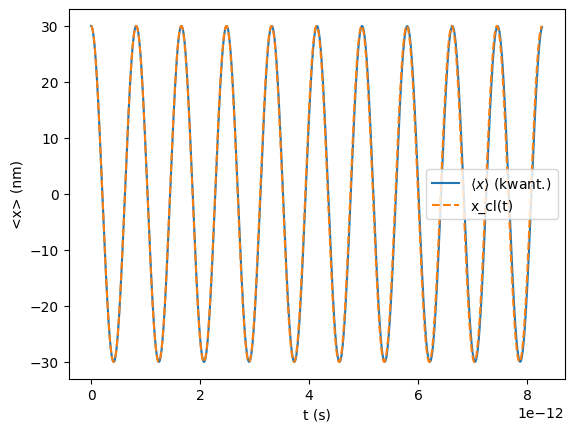

Kształt tablicy danych (Z): (684, 201)


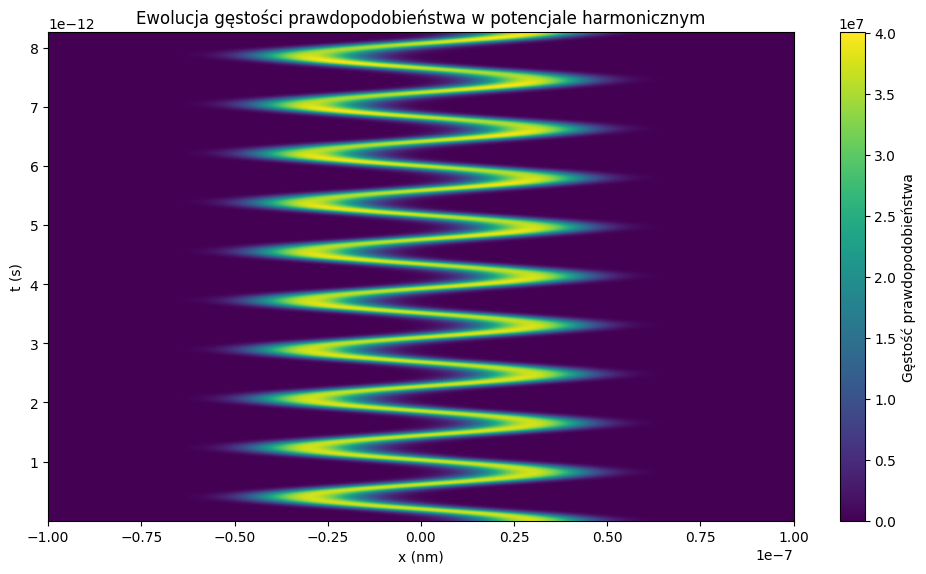

Heatmapa została pomyślnie zapisana jako 'heatmap_gestosci_oscylator_harmoniczny.png'


In [20]:

# Parametry początkowe
x0 = 30 * nm
psi0 = np.exp(- (m * omega * (x - x0)**2) / (2 * hbar))
psi0 = normalize(psi0, x)

psi_prev = psi0 * np.exp(-1j * omega * dt / 2)  
psi_curr = psi0.copy()  

times = [0.0]
expect_x = [expectation_x(psi_curr, x)]
classical_x = [x0 * np.cos(0.0)]

snap_every = 500
snapshots = []
snapshot_times = []

for step in range(1, n_steps+1):
    t = step * dt
    Hpsi = hamiltonian(psi_curr, V_harm, m, dx)
    psi_next = psi_prev + (2j * dt / hbar) * Hpsi  

    # na końcach zachowujemy warunek Dirichleta psi=0
    psi_next[0] = 0+0j
    psi_next[-1] = 0+0j
    
    psi_prev, psi_curr = psi_curr, psi_next
    
    if step % snap_every == 0 or step == 1:
        snapshots.append(np.abs(psi_curr)**2)
        snapshot_times.append(t)
    
    if step % 50 == 0:
        times.append(t)
        expect_x.append(expectation_x(psi_curr, x))
        classical_x.append(x0 * np.cos(omega * t))

print('Gotowe: część 1 — ewolucja zakończona. Zapisano', len(snapshots), 'zrzutów gęstości.')

# <x>(t) vs klasyczne
plt.plot(np.array(times), np.array(expect_x) / nm, label=r'$\langle x\rangle$ (kwant.)')
plt.plot(np.array(times), np.array(classical_x) / nm, '--', label='x_cl(t)')
plt.xlabel('t (s)')
plt.ylabel('<x> (nm)')
plt.legend()
plt.savefig('porownanie_ruchu_klasycznego_i_kwantowego.png') 
plt.show()
# plt.set_title('Porównanie ⟨x⟩(t) z ruchem klasycznym')


plot_density_heatmap(snapshots, snapshot_times, x, 
                     filename="heatmap_gestosci_oscylator_harmoniczny.png",
                     title="Ewolucja gęstości prawdopodobieństwa w potencjale harmonicznym")


Gotowe: część 2 — ewolucja zakończona. Zapisano 0 zrzutów gęstości.
Kształt tablicy danych (Z): (684, 201)


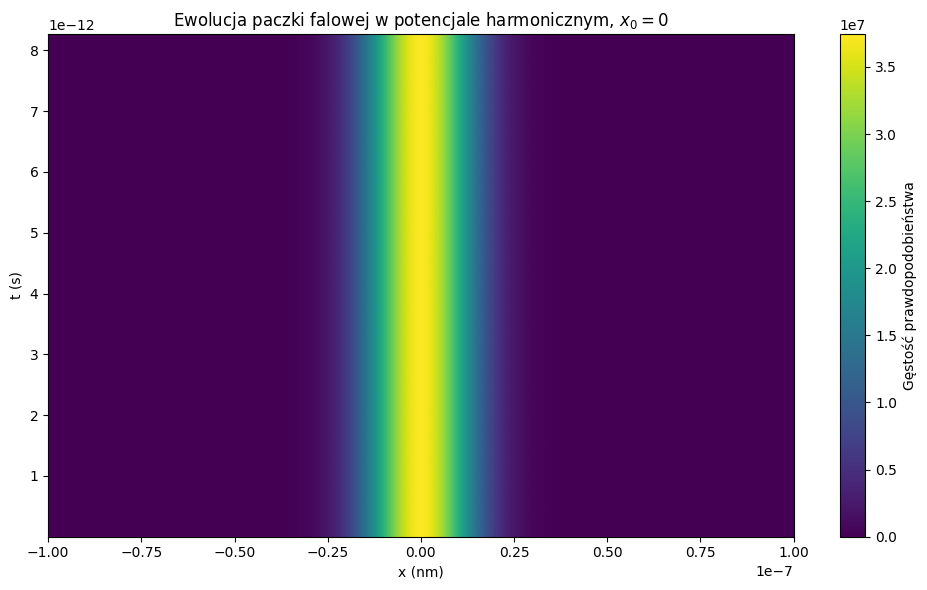

Heatmapa została pomyślnie zapisana jako 'oscylator_harmoniczny_ewolucja_x0_0.png'


In [21]:

# Część 2: x0 = 0
x0 = 0.0
psi0 = np.exp(- (m * omega * (x - x0)**2) / (2 * hbar))
psi0 = normalize(psi0, x)

psi_prev = psi0 * np.exp(-1j * omega * dt / 2)
psi_curr = psi0.copy()

snap_every = 500
snapshots2 = []
snapshot_times2 = []
print('Gotowe: część 2 — ewolucja zakończona. Zapisano', len(snapshots2), 'zrzutów gęstości.')


for step in range(1, n_steps+1):
    t = step * dt
    Hpsi = hamiltonian(psi_curr, V_harm, m, dx)
    psi_next = psi_prev + (2j * dt / hbar) * Hpsi
    psi_next[0] = 0+0j
    psi_next[-1] = 0+0j
    psi_prev, psi_curr = psi_curr, psi_next
    if step % snap_every == 0 or step == 1:
        snapshots2.append(np.abs(psi_curr)**2)
        snapshot_times2.append(t)

plot_density_heatmap(snapshots2, snapshot_times2, x, 
                     filename="oscylator_harmoniczny_ewolucja_x0_0.png",
                     title="Ewolucja paczki falowej w potencjale harmonicznym, $x_0=0$")


Gotowe: część 3 — ewolucja w pudełku zakończona. Zapisano 684 zrzutów gęstości.
Kształt tablicy danych (Z): (684, 201)


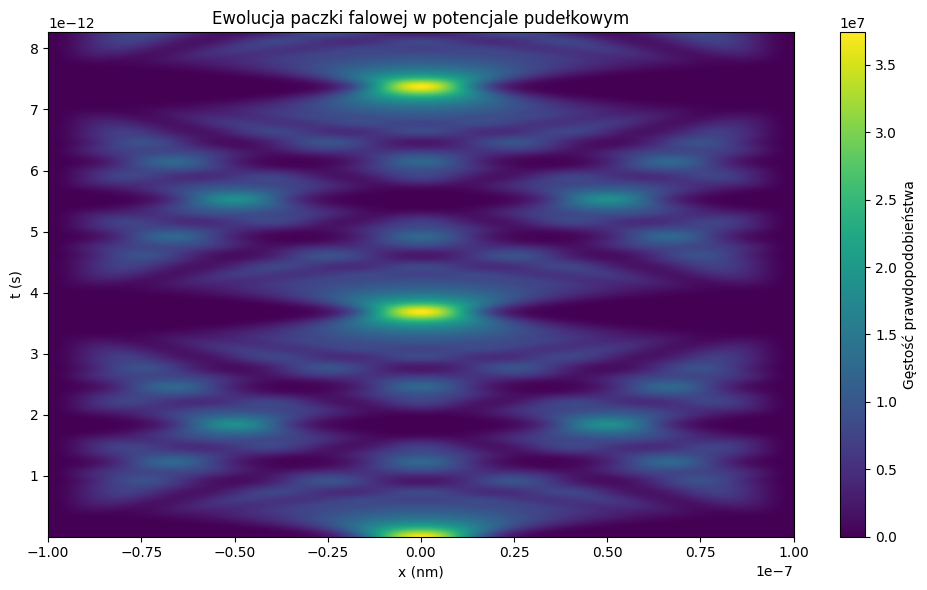

Heatmapa została pomyślnie zapisana jako 'pudelko_ewolucja.png'


In [22]:

# Część 3: potencjał = 0 (wewnątrz pudełka) + psi=0 na krańcach
V_box = np.zeros_like(x)
x0 = 0.0
psi0 = np.exp(- (m * omega * (x - x0)**2) / (2 * hbar))
psi0 = normalize(psi0, x)

psi_prev = psi0 * np.exp(-1j * omega * dt / 2)  
psi_curr = psi0.copy()

snap_every = 500
snapshots3 = []
snapshot_times3 = []

for step in range(1, n_steps+1):
    t = step * dt
    Hpsi = hamiltonian(psi_curr, V_box, m, dx)
    psi_next = psi_prev + (2j * dt / hbar) * Hpsi
    psi_next[0] = 0+0j
    psi_next[-1] = 0+0j
    psi_prev, psi_curr = psi_curr, psi_next
    if step % snap_every == 0 or step == 1:
        snapshots3.append(np.abs(psi_curr)**2)
        snapshot_times3.append(t)

print('Gotowe: część 3 — ewolucja w pudełku zakończona. Zapisano', len(snapshots3), 'zrzutów gęstości.')
plot_density_heatmap(snapshots3, snapshot_times3, x, 
                     filename="pudelko_ewolucja.png",
                     title="Ewolucja paczki falowej w potencjale pudełkowym") 
                    